In [ ]:
'''
Plot distance distribution of links and compare with GCD between all pairs.
We first apply KDE to the GCD between each two nodes and create the distance distribution curve. 
Then, we use the distance distribution of links and plot the distribution. 
Finally, we include a power law fit and compare these curves.
'''

In [ ]:
import numpy as np
import pickle
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [7]:
# load distance data of all pair
with open("distance_list", "rb") as fp:
    data = pickle.load(fp)

In [8]:
len(data), type(data)

(57744000, list)

In [13]:
# generate the x-axis scale
x1 = np.linspace(10, 100, 100)
x2 = np.linspace(100, 1000, 100)
x3 = np.linspace(1000, 10000, 100)
x4 = np.linspace(10000, 100000, 100)
x_bin = np.concatenate((x1, x2, x3, x4))

# check property of x-axis
len(x)


400

d:\ic\urop\urop_venv\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


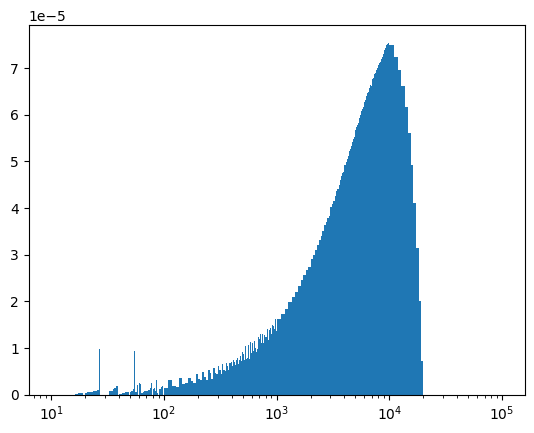

In [14]:
# plot the distance distribution
data = np.array(data)
data = data.reshape(-1, 1)
plt.hist(data, bins=x_bin, density=True)
plt.xscale('log')
plt.show()


In [19]:
# define the kde for data
kde = KernelDensity(bandwidth=15, kernel='gaussian')
kde.fit(data)

KernelDensity(bandwidth=15)

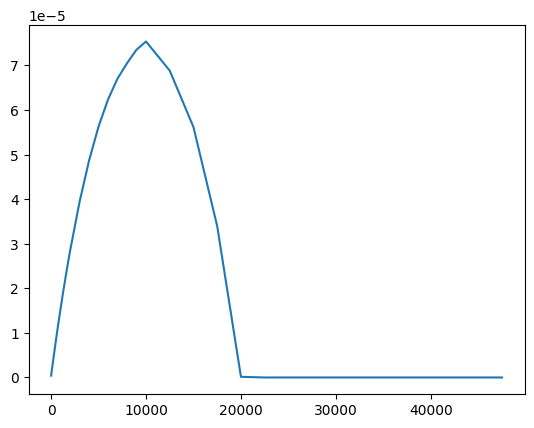

In [20]:
# reshape x to satisfy the function
x = x.reshape(-1, 1)

# Calculate the log of the probability density
logprob = kde.score_samples(x)

# Plot the KDE line
plt.plot(x, np.exp(logprob))

In [2]:
#print(type(logprob))
#np.save("logprob.npy", logprob)
#just read log prob
logprob = np.load("logprob.npy")

d:\ic\urop\urop_venv\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


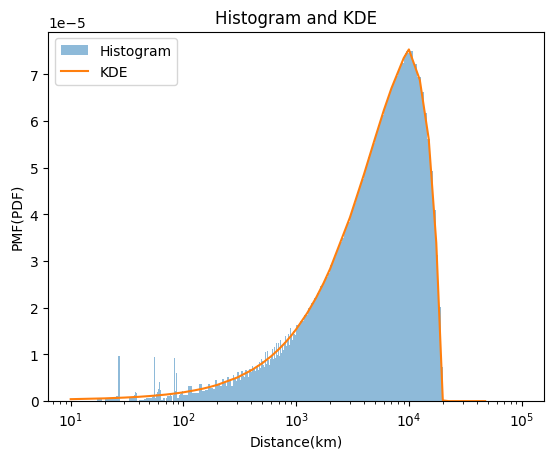

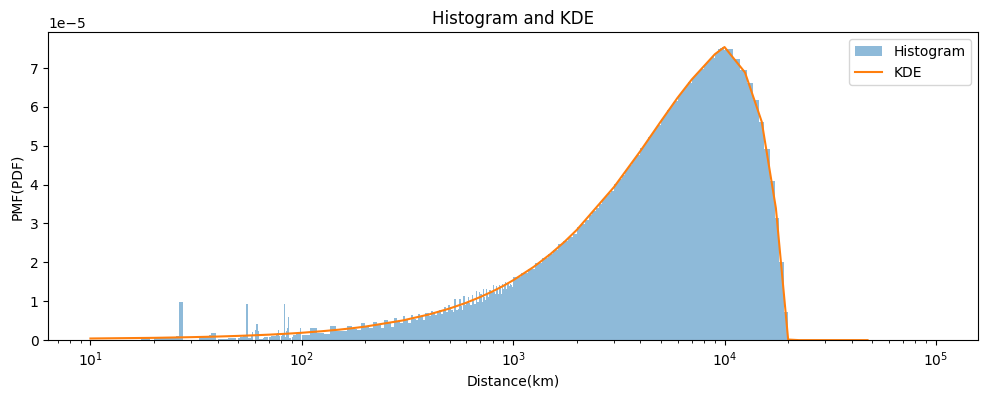

In [27]:
# plot the histogram with KDE
plt.hist(data, bins=x_bin, density=True, alpha=0.5, label='Histogram')
plt.plot(x, np.exp(logprob), label='KDE')
plt.xscale('log')
plt.xlabel('Distance(km)')
plt.ylabel('PMF(PDF)')
plt.title('Histogram and KDE')
plt.legend()
plt.show()

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)
plt.hist(data, bins=x_bin, density=True, alpha=0.5, label='Histogram')
plt.plot(x, np.exp(logprob), label='KDE')
plt.xscale('log')
plt.xlabel('Distance(km)')
plt.ylabel('PMF(PDF)')
plt.title('Histogram and KDE')
plt.legend()
plt.show()


49
[   10    20    30    40    50    60    70    80    90   100   125   150
   175   200   300   400   500   600   700   800   900  1000  1250  1500
  1750  2000  3000  4000  5000  6000  7000  8000  9000 10000 12500 15000
 17500 20000 22500 25000 27500 30000 32500 35000 37500 40000 42500 45000
 47500]


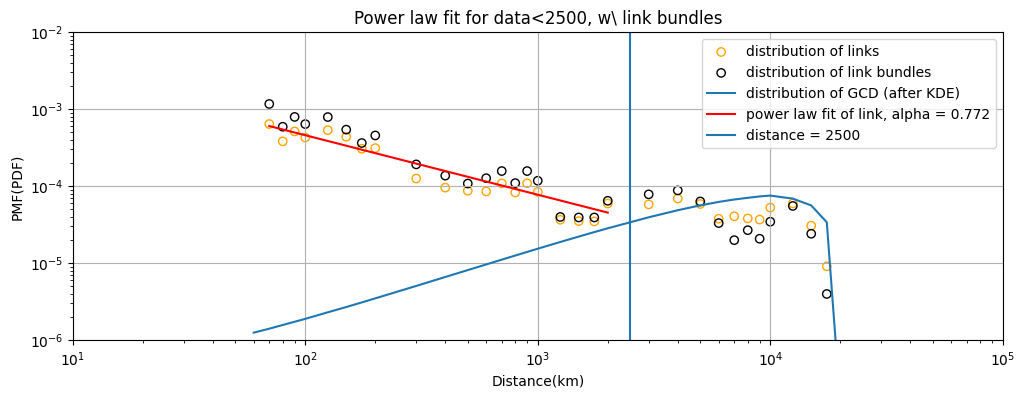

In [13]:
x1 = np.arange(10, 100, 10)
x2 = np.arange(100, 200, 25)
x22 = np.arange(200, 1000, 100)
x3 = np.arange(1000, 2000, 250)
x4 = np.arange(2000, 10000, 1000)
x5 = np.arange(10000, 50000, 2500)
x = np.concatenate((x1, x2, x22, x3, x4, x5))
print(len(x))
print(x)
xrange = np.concatenate((np.repeat(10, 9), np.repeat(25, 4), np.repeat(100, 8), np.repeat(250, 4), np.repeat(1000, 8), np.repeat(2500,16)))

# import distance distribution of links
#with open("D:/ic/urop/data/Event Sync/distanceSCA/count_list_finalSCA", "rb") as fp:
#    dis_distri = pickle.load(fp)
#count = np.load("distance_distribution_updated_SCA.npy")
dis_distri = [0, 1377, 1262, 632, 1692, 1138, 2596, 1548, 2081, 4337, 5403, 4435, 3101, 12650, 5093, 3874, 3530, 3455, 4400, 3348, 4419, 8517, 3708, 3563, 3527, 24080, 23472, 27929, 23757, 15298, 16461, 15439, 14914, 53388, 60403, 31063, 9215, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 396]
count = np.array(dis_distri)
sumcount = np.sum(count)
count_list = count[0:49]/xrange/sumcount

# include distance distribuion of link bundles
#bundle_distri = np.load("linkbundle.npy")
bundle_distri = [0, 49, 30, 12, 41, 22, 81, 41, 55, 111, 137, 94, 63, 316, 133, 95, 75, 88, 109, 76, 109, 204, 69, 68, 68, 448, 543, 611, 439, 230, 138, 186, 144, 599, 960, 418, 69, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13]
sum_bundle = np.sum(bundle_distri)
bundle_list = bundle_distri[0:49]/xrange/sum_bundle

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)

plt.scatter(x[6:37], count_list[6:37], facecolor='none', edgecolors='orange', label = "distribution of links")
plt.scatter(x[6:37], bundle_list[6:37], facecolor='none', edgecolors='black', label = "distribution of link bundles")
plt.plot(x[5:38], np.exp(logprob)[5:38], label='distribution of GCD (after KDE)')

#inv_interval = np.linspace(50, 10000, 1000)
#plt.plot(inv_interval, inv_interval**(-0.782)/100, linestyle='dashed', label='Power-law fit, alpha=0.782')

# apply a power law fit for links that have short distances
def power_law(x,a,b):
    return a * x**b
x_data = x[6:26]
y_data = count_list[6:26]
params, covariance = curve_fit(power_law, x_data, y_data)
a_fit, b_fit = params
# plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, power_law(x_data, a_fit, b_fit), color='r', label="power law fit of link, alpha = %.3f" %-b_fit)

plt.axvline(x = 2500, label = "distance = 2500")

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Distance(km)')
plt.ylabel('PMF(PDF)')
plt.legend()
plt.title("Power law fit for data<2500, w\ link bundles")
plt.ylim(10**-6, 10**-2)
plt.xlim(10, 10**5)
plt.grid()
plt.show()
